In [195]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm
import pickle
from sklearn.preprocessing import StandardScaler

In [196]:
dataset = []
image = nib.load('./ADNI_011_S_0010_PET_30_min_3D_FDG_4i_16s__br_raw_20051114113046731_1_S10060_I8664.nii')
dataset.append(np.array(image.get_fdata())[:,:,:,0]/np.array(image.get_fdata())[:,:,:,0].max())
dataset = np.array(dataset)

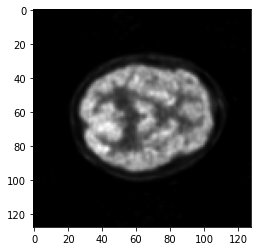

In [197]:
plt.imshow(dataset[0][:,:,32],cmap='gray')
plt.show()

In [198]:
class SuperVoxel():
    '''Class to represent a supervoxel'''
    def __init__(self,intensity,x,y,z):
        self.i = intensity
        self.x = x
        self.y = y
        self.z = z
        self.coord = np.array((x,y,z))
        self.voxels = {}
        
    def update(self,intensity,x,y,z):
        self.i = intensity
        self.x = x
        self.y = y
        self.z = z
        self.coord = np.array((x,y,z))

    def describe(self):
        print("Coordinates: ",self.coord," Intensity: ",self.i, " Voxel Count: ",len(self.voxels))
      
        

In [199]:
def imageConvert(img,clusters):
    image = np.asarray(img).copy()
    for c in tqdm(clusters):
        for x,y,z in c.voxels:
            image[x,y,z]=c.i
    return image

In [200]:
#Importing file
pkl = open('clusters.pkl','rb')

clusters = pickle.load(pkl)

pkl.close()

In [201]:
for c in clusters:
    c.describe()

Coordinates:  [1 1 1]  Intensity:  0.0  Voxel Count:  63
Coordinates:  [1 1 6]  Intensity:  0.0  Voxel Count:  72
Coordinates:  [ 1  1 11]  Intensity:  0.0  Voxel Count:  80
Coordinates:  [ 1  1 16]  Intensity:  0.0  Voxel Count:  66
Coordinates:  [ 1  1 21]  Intensity:  0.0  Voxel Count:  80
Coordinates:  [ 1  1 26]  Intensity:  0.0  Voxel Count:  71
Coordinates:  [ 1  1 31]  Intensity:  0.0  Voxel Count:  77
Coordinates:  [ 1  1 36]  Intensity:  0.0  Voxel Count:  76
Coordinates:  [ 1  1 41]  Intensity:  0.0  Voxel Count:  78
Coordinates:  [ 1  1 46]  Intensity:  0.0  Voxel Count:  80
Coordinates:  [ 1  1 51]  Intensity:  0.0  Voxel Count:  72
Coordinates:  [ 1  1 56]  Intensity:  0.0  Voxel Count:  66
Coordinates:  [ 1  1 60]  Intensity:  0.0  Voxel Count:  62
Coordinates:  [1 5 1]  Intensity:  0.0  Voxel Count:  70
Coordinates:  [1 5 5]  Intensity:  0.0  Voxel Count:  99
Coordinates:  [ 1  5 11]  Intensity:  0.0  Voxel Count:  99
Coordinates:  [ 1  5 15]  Intensity:  0.0  Voxel Cou

Coordinates:  [ 5  1 21]  Intensity:  0.0  Voxel Count:  85
Coordinates:  [ 5  1 25]  Intensity:  0.0  Voxel Count:  94
Coordinates:  [ 5  1 31]  Intensity:  0.0  Voxel Count:  82
Coordinates:  [ 6  1 36]  Intensity:  0.0  Voxel Count:  85
Coordinates:  [ 6  1 41]  Intensity:  0.0  Voxel Count:  91
Coordinates:  [ 5  1 46]  Intensity:  0.0  Voxel Count:  87
Coordinates:  [ 5  1 50]  Intensity:  0.0  Voxel Count:  99
Coordinates:  [ 5  1 55]  Intensity:  0.0  Voxel Count:  88
Coordinates:  [ 5  1 60]  Intensity:  0.0  Voxel Count:  61
Coordinates:  [5 5 1]  Intensity:  0.0  Voxel Count:  51
Coordinates:  [5 5 5]  Intensity:  0.0  Voxel Count:  110
Coordinates:  [ 5  5 11]  Intensity:  0.0  Voxel Count:  100
Coordinates:  [ 6  5 15]  Intensity:  0.0  Voxel Count:  118
Coordinates:  [ 6  6 20]  Intensity:  0.0  Voxel Count:  95
Coordinates:  [ 5  5 25]  Intensity:  0.0  Voxel Count:  90
Coordinates:  [ 5  5 29]  Intensity:  0.0  Voxel Count:  82
Coordinates:  [ 5  4 34]  Intensity:  0.0  

Coordinates:  [  5 125  60]  Intensity:  0.0  Voxel Count:  73
Coordinates:  [10  1  1]  Intensity:  0.0  Voxel Count:  60
Coordinates:  [11  1  5]  Intensity:  0.0  Voxel Count:  78
Coordinates:  [10  1 11]  Intensity:  0.0  Voxel Count:  73
Coordinates:  [10  1 16]  Intensity:  0.0  Voxel Count:  89
Coordinates:  [11  1 20]  Intensity:  0.0  Voxel Count:  77
Coordinates:  [10  1 25]  Intensity:  0.0  Voxel Count:  80
Coordinates:  [11  1 31]  Intensity:  0.0  Voxel Count:  79
Coordinates:  [11  1 36]  Intensity:  0.0  Voxel Count:  88
Coordinates:  [11  1 40]  Intensity:  0.0  Voxel Count:  87
Coordinates:  [10  1 45]  Intensity:  0.0  Voxel Count:  86
Coordinates:  [10  1 51]  Intensity:  0.0  Voxel Count:  70
Coordinates:  [11  1 55]  Intensity:  0.0  Voxel Count:  74
Coordinates:  [11  2 60]  Intensity:  0.0  Voxel Count:  95
Coordinates:  [9 4 0]  Intensity:  0.0  Voxel Count:  43
Coordinates:  [10  5  4]  Intensity:  0.0  Voxel Count:  108
Coordinates:  [10  4  9]  Intensity:  0

Coordinates:  [ 10 125  36]  Intensity:  0.0  Voxel Count:  74
Coordinates:  [ 10 125  40]  Intensity:  0.0  Voxel Count:  68
Coordinates:  [ 10 125  45]  Intensity:  0.0  Voxel Count:  109
Coordinates:  [ 10 125  51]  Intensity:  0.0  Voxel Count:  87
Coordinates:  [ 10 125  55]  Intensity:  0.0  Voxel Count:  84
Coordinates:  [ 11 124  60]  Intensity:  0.0  Voxel Count:  116
Coordinates:  [14  0  1]  Intensity:  0.0  Voxel Count:  33
Coordinates:  [16  1  5]  Intensity:  0.000946073793755913  Voxel Count:  106
Coordinates:  [14  0  9]  Intensity:  6.103701895199438e-05  Voxel Count:  57
Coordinates:  [15  1 14]  Intensity:  0.0  Voxel Count:  76
Coordinates:  [15  1 20]  Intensity:  0.0  Voxel Count:  82
Coordinates:  [14  0 26]  Intensity:  0.0  Voxel Count:  47
Coordinates:  [15  1 31]  Intensity:  0.0  Voxel Count:  80
Coordinates:  [15  1 36]  Intensity:  0.0  Voxel Count:  65
Coordinates:  [15  1 41]  Intensity:  0.0  Voxel Count:  93
Coordinates:  [15  1 45]  Intensity:  0.0  V

Coordinates:  [18 24 43]  Intensity:  3.051850947599719e-05  Voxel Count:  153
Coordinates:  [23 24 44]  Intensity:  3.051850947599719e-05  Voxel Count:  120
Coordinates:  [21 27 54]  Intensity:  3.051850947599719e-05  Voxel Count:  116
Coordinates:  [17 26 53]  Intensity:  0.0  Voxel Count:  160
Coordinates:  [20 25 60]  Intensity:  0.0  Voxel Count:  127
Coordinates:  [21 30  0]  Intensity:  0.0010681478316599017  Voxel Count:  80
Coordinates:  [20 30  5]  Intensity:  0.0  Voxel Count:  124
Coordinates:  [19 30  9]  Intensity:  0.0  Voxel Count:  122
Coordinates:  [21 29 18]  Intensity:  0.0  Voxel Count:  115
Coordinates:  [17 29 20]  Intensity:  0.0003967406231879635  Voxel Count:  134
Coordinates:  [20 30 25]  Intensity:  0.0  Voxel Count:  119
Coordinates:  [16 28 30]  Intensity:  9.155552842799158e-05  Voxel Count:  201
Coordinates:  [20 30 35]  Intensity:  0.0003662221137119663  Voxel Count:  142
Coordinates:  [19 29 39]  Intensity:  9.155552842799158e-05  Voxel Count:  106
Coo

Coordinates:  [19 55 38]  Intensity:  0.0  Voxel Count:  75
Coordinates:  [23 52 46]  Intensity:  9.155552842799158e-05  Voxel Count:  78
Coordinates:  [21 58 50]  Intensity:  0.0005493331705679495  Voxel Count:  99
Coordinates:  [23 53 56]  Intensity:  0.002349925229651784  Voxel Count:  129
Coordinates:  [25 55 59]  Intensity:  0.00271614734336375  Voxel Count:  128
Coordinates:  [18 60  0]  Intensity:  0.0  Voxel Count:  18
Coordinates:  [24 59  5]  Intensity:  0.005676442762535478  Voxel Count:  133
Coordinates:  [19 60 10]  Intensity:  0.0  Voxel Count:  0
Coordinates:  [23 60 16]  Intensity:  0.017334513382366405  Voxel Count:  161
Coordinates:  [25 57 18]  Intensity:  0.014160588396862697  Voxel Count:  97
Coordinates:  [23 57 25]  Intensity:  0.000793481246375927  Voxel Count:  139
Coordinates:  [24 58 31]  Intensity:  0.0003967406231879635  Voxel Count:  142
Coordinates:  [23 57 35]  Intensity:  0.0  Voxel Count:  95
Coordinates:  [22 57 40]  Intensity:  0.0017700735496078372 

Coordinates:  [27 49 16]  Intensity:  0.044862208929715874  Voxel Count:  195
Coordinates:  [29 55 21]  Intensity:  0.08999908444471572  Voxel Count:  119
Coordinates:  [30 53 25]  Intensity:  0.07898190252388074  Voxel Count:  142
Coordinates:  [27 54 30]  Intensity:  0.04159672841578417  Voxel Count:  180
Coordinates:  [29 56 36]  Intensity:  0.08441419721060824  Voxel Count:  119
Coordinates:  [29 54 40]  Intensity:  0.10568559831537827  Voxel Count:  92
Coordinates:  [31 54 43]  Intensity:  0.07730338450270088  Voxel Count:  85
Coordinates:  [28 56 48]  Intensity:  9.155552842799158e-05  Voxel Count:  122
Coordinates:  [29 53 55]  Intensity:  0.02359080782494583  Voxel Count:  110
Coordinates:  [30 54 60]  Intensity:  0.011047700430310984  Voxel Count:  111
Coordinates:  [28 60  1]  Intensity:  0.07705923642689291  Voxel Count:  122
Coordinates:  [29 61  5]  Intensity:  0.0522171697134312  Voxel Count:  91
Coordinates:  [26 58 10]  Intensity:  0.03286843470564898  Voxel Count:  187

Coordinates:  [33 64 13]  Intensity:  0.13757744071779535  Voxel Count:  161
Coordinates:  [31 65 17]  Intensity:  0.06817835016937773  Voxel Count:  115
Coordinates:  [35 65 20]  Intensity:  0.576494644001587  Voxel Count:  146
Coordinates:  [32 65 24]  Intensity:  0.34589678640095217  Voxel Count:  160
Coordinates:  [34 63 30]  Intensity:  0.5230567339091159  Voxel Count:  164
Coordinates:  [35 64 36]  Intensity:  0.42356639301736504  Voxel Count:  103
Coordinates:  [36 63 40]  Intensity:  0.5417340617084262  Voxel Count:  137
Coordinates:  [32 65 45]  Intensity:  0.07025360881374554  Voxel Count:  0
Coordinates:  [31 64 51]  Intensity:  0.011993774224066897  Voxel Count:  174
Coordinates:  [35 65 55]  Intensity:  0.0013733329264198737  Voxel Count:  104
Coordinates:  [34 64 60]  Intensity:  0.0026245918149357585  Voxel Count:  93
Coordinates:  [34 69  1]  Intensity:  0.21976378673665578  Voxel Count:  99
Coordinates:  [34 69  5]  Intensity:  0.1216467787713248  Voxel Count:  108
Coo

Coordinates:  [38 79 60]  Intensity:  0.003173924985503708  Voxel Count:  113
Coordinates:  [38 82  2]  Intensity:  0.03430280465102085  Voxel Count:  115
Coordinates:  [39 85  5]  Intensity:  0.013733329264198737  Voxel Count:  90
Coordinates:  [39 85 10]  Intensity:  0.058412427137058624  Voxel Count:  140
Coordinates:  [40 85 16]  Intensity:  0.11053804132206183  Voxel Count:  134
Coordinates:  [38 84 19]  Intensity:  0.11758781701101718  Voxel Count:  128
Coordinates:  [36 84 27]  Intensity:  0.08194219794305246  Voxel Count:  153
Coordinates:  [37 85 31]  Intensity:  0.4380016479995117  Voxel Count:  112
Coordinates:  [37 85 35]  Intensity:  0.6355479598376416  Voxel Count:  122
Coordinates:  [38 85 39]  Intensity:  0.5909604174932096  Voxel Count:  141
Coordinates:  [39 85 44]  Intensity:  0.6627704702902311  Voxel Count:  138
Coordinates:  [41 86 51]  Intensity:  0.020386364329966124  Voxel Count:  109
Coordinates:  [36 82 55]  Intensity:  0.0  Voxel Count:  88
Coordinates:  [38

Coordinates:  [44 90 42]  Intensity:  0.6581621753593554  Voxel Count:  102
Coordinates:  [45 87 44]  Intensity:  0.609210486159856  Voxel Count:  147
Coordinates:  [43 90 51]  Intensity:  0.009521774956511124  Voxel Count:  122
Coordinates:  [43 89 59]  Intensity:  0.0011597033600878933  Voxel Count:  119
Coordinates:  [40 87 59]  Intensity:  0.0  Voxel Count:  142
Coordinates:  [42 94  1]  Intensity:  0.05581835383159887  Voxel Count:  95
Coordinates:  [44 95  5]  Intensity:  0.0686056093020417  Voxel Count:  166
Coordinates:  [42 97 11]  Intensity:  0.040955839716788234  Voxel Count:  67
Coordinates:  [43 94 15]  Intensity:  0.06588946195867794  Voxel Count:  117
Coordinates:  [42 96 20]  Intensity:  0.1152073732718894  Voxel Count:  151
Coordinates:  [45 94 23]  Intensity:  0.15552232428968168  Voxel Count:  136
Coordinates:  [43 95 27]  Intensity:  0.09662160100100711  Voxel Count:  139
Coordinates:  [45 95 36]  Intensity:  0.6724448377941221  Voxel Count:  112
Coordinates:  [42 9

Coordinates:  [ 47 110  39]  Intensity:  9.155552842799158e-05  Voxel Count:  99
Coordinates:  [ 46 110  43]  Intensity:  0.0  Voxel Count:  89
Coordinates:  [ 47 109  50]  Intensity:  0.0  Voxel Count:  152
Coordinates:  [ 49 108  56]  Intensity:  0.0009155552842799158  Voxel Count:  108
Coordinates:  [ 49 111  60]  Intensity:  0.00015259254737998596  Voxel Count:  108
Coordinates:  [ 47 113   2]  Intensity:  0.017883846552934356  Voxel Count:  106
Coordinates:  [ 50 117   6]  Intensity:  0.07773064363536485  Voxel Count:  161
Coordinates:  [ 49 116  12]  Intensity:  0.006775109103671377  Voxel Count:  149
Coordinates:  [ 45 116  15]  Intensity:  0.008667256691183203  Voxel Count:  177
Coordinates:  [ 48 115  20]  Intensity:  0.0007324442274239326  Voxel Count:  151
Coordinates:  [ 50 113  25]  Intensity:  0.0030823694570757164  Voxel Count:  209
Coordinates:  [ 49 114  30]  Intensity:  0.0015564439832758568  Voxel Count:  152
Coordinates:  [ 50 116  36]  Intensity:  0.0  Voxel Count:

Coordinates:  [58  9 46]  Intensity:  9.155552842799158e-05  Voxel Count:  152
Coordinates:  [61 10 51]  Intensity:  0.0  Voxel Count:  162
Coordinates:  [58  9 55]  Intensity:  6.103701895199438e-05  Voxel Count:  88
Coordinates:  [59  7 60]  Intensity:  0.0  Voxel Count:  112
Coordinates:  [59 16  0]  Intensity:  3.051850947599719e-05  Voxel Count:  67
Coordinates:  [58 16  4]  Intensity:  0.0  Voxel Count:  106
Coordinates:  [57 16  9]  Intensity:  3.051850947599719e-05  Voxel Count:  112
Coordinates:  [57 15 13]  Intensity:  0.0  Voxel Count:  98
Coordinates:  [58 14 18]  Intensity:  0.0  Voxel Count:  81
Coordinates:  [59 13 24]  Intensity:  9.155552842799158e-05  Voxel Count:  133
Coordinates:  [60 14 31]  Intensity:  0.0  Voxel Count:  127
Coordinates:  [61 15 36]  Intensity:  0.0  Voxel Count:  99
Coordinates:  [60 16 40]  Intensity:  0.0  Voxel Count:  105
Coordinates:  [58 14 44]  Intensity:  0.0  Voxel Count:  110
Coordinates:  [59 14 50]  Intensity:  0.0  Voxel Count:  145


Coordinates:  [66 38 46]  Intensity:  0.15179906613361002  Voxel Count:  175
Coordinates:  [62 40 51]  Intensity:  0.024872585222937713  Voxel Count:  161
Coordinates:  [64 40 56]  Intensity:  0.12305063020722068  Voxel Count:  137
Coordinates:  [66 41 60]  Intensity:  0.0053102206488235115  Voxel Count:  145
Coordinates:  [62 47  2]  Intensity:  0.11014130069887387  Voxel Count:  117
Coordinates:  [64 44  4]  Intensity:  0.05948057496871853  Voxel Count:  76
Coordinates:  [62 46  7]  Intensity:  0.046357615894039736  Voxel Count:  136
Coordinates:  [63 44 14]  Intensity:  0.3184301278725547  Voxel Count:  142
Coordinates:  [67 46 21]  Intensity:  0.38926358836634417  Voxel Count:  87
Coordinates:  [63 44 22]  Intensity:  0.4496292001098666  Voxel Count:  113
Coordinates:  [62 44 29]  Intensity:  0.7957701345866268  Voxel Count:  125
Coordinates:  [62 46 34]  Intensity:  0.41724906155583363  Voxel Count:  129
Coordinates:  [62 46 40]  Intensity:  0.5086214789269692  Voxel Count:  103
C

Coordinates:  [67 63 52]  Intensity:  0.3814203314310129  Voxel Count:  105
Coordinates:  [71 61 54]  Intensity:  0.5671254615924558  Voxel Count:  112
Coordinates:  [71 64 59]  Intensity:  0.06436353648487808  Voxel Count:  132
Coordinates:  [66 68  2]  Intensity:  0.07159642323068942  Voxel Count:  86
Coordinates:  [71 70  7]  Intensity:  0.08191167943357647  Voxel Count:  179
Coordinates:  [68 68 11]  Intensity:  0.09302041688283945  Voxel Count:  140
Coordinates:  [69 71 16]  Intensity:  0.10379345072786646  Voxel Count:  105
Coordinates:  [68 70 21]  Intensity:  0.18424024170659506  Voxel Count:  91
Coordinates:  [67 67 24]  Intensity:  0.24152348399304177  Voxel Count:  126
Coordinates:  [67 71 29]  Intensity:  0.38947721793267615  Voxel Count:  153
Coordinates:  [68 73 35]  Intensity:  0.28522598956266976  Voxel Count:  139
Coordinates:  [68 69 41]  Intensity:  0.1597949156163213  Voxel Count:  152
Coordinates:  [70 71 44]  Intensity:  0.1672719504379406  Voxel Count:  66
Coordi

Coordinates:  [71 69 26]  Intensity:  0.23374126407666249  Voxel Count:  119
Coordinates:  [74 69 31]  Intensity:  0.6049073763237404  Voxel Count:  148
Coordinates:  [71 68 35]  Intensity:  0.3249610889004181  Voxel Count:  164
Coordinates:  [74 69 42]  Intensity:  0.15225684377575  Voxel Count:  141
Coordinates:  [72 68 46]  Intensity:  0.24506363109225746  Voxel Count:  0
Coordinates:  [74 70 53]  Intensity:  0.7096774193548387  Voxel Count:  153
Coordinates:  [74 69 58]  Intensity:  0.018951994384594256  Voxel Count:  122
Coordinates:  [74 69 58]  Intensity:  0.018951994384594256  Voxel Count:  0
Coordinates:  [75 74  0]  Intensity:  0.012421033356730858  Voxel Count:  61
Coordinates:  [74 75  4]  Intensity:  0.17014069032868434  Voxel Count:  169
Coordinates:  [75 75 11]  Intensity:  0.09631641590624714  Voxel Count:  157
Coordinates:  [74 74 18]  Intensity:  0.41673024689474164  Voxel Count:  109
Coordinates:  [71 74 20]  Intensity:  0.3879818109683523  Voxel Count:  103
Coordina

Coordinates:  [77 94 30]  Intensity:  0.575762199774163  Voxel Count:  122
Coordinates:  [79 95 36]  Intensity:  0.6617328409680471  Voxel Count:  145
Coordinates:  [76 92 40]  Intensity:  0.6422925504318369  Voxel Count:  95
Coordinates:  [79 95 46]  Intensity:  0.13016144291512802  Voxel Count:  180
Coordinates:  [78 94 50]  Intensity:  0.031189916684469132  Voxel Count:  99
Coordinates:  [79 94 55]  Intensity:  0.0017700735496078372  Voxel Count:  114
Coordinates:  [81 97 59]  Intensity:  0.0010071108127079073  Voxel Count:  94
Coordinates:  [ 76 101   1]  Intensity:  0.07516708883938109  Voxel Count:  104
Coordinates:  [80 99  3]  Intensity:  0.018219550157170323  Voxel Count:  114
Coordinates:  [80 99  9]  Intensity:  0.02294991912594989  Voxel Count:  137
Coordinates:  [ 78 100  13]  Intensity:  0.058412427137058624  Voxel Count:  136
Coordinates:  [79 98 20]  Intensity:  0.06204412976470229  Voxel Count:  90
Coordinates:  [79 99 24]  Intensity:  0.047486800744651635  Voxel Count

Coordinates:  [84 99  4]  Intensity:  0.042359691152684106  Voxel Count:  125
Coordinates:  [86 99 10]  Intensity:  0.0446180608539079  Voxel Count:  180
Coordinates:  [84 99 16]  Intensity:  0.054109317300943024  Voxel Count:  190
Coordinates:  [82 98 20]  Intensity:  0.039735099337748346  Voxel Count:  56
Coordinates:  [85 98 24]  Intensity:  0.0814844203009125  Voxel Count:  111
Coordinates:  [80 99 28]  Intensity:  0.029877620777001252  Voxel Count:  133
Coordinates:  [82 99 34]  Intensity:  0.1054719687490463  Voxel Count:  203
Coordinates:  [ 85 101  41]  Intensity:  0.00827051606799524  Voxel Count:  184
Coordinates:  [ 83 101  46]  Intensity:  0.0  Voxel Count:  149
Coordinates:  [ 85 100  51]  Intensity:  0.0  Voxel Count:  122
Coordinates:  [ 82 103  55]  Intensity:  0.001892147587511826  Voxel Count:  106
Coordinates:  [84 99 59]  Intensity:  0.0  Voxel Count:  125
Coordinates:  [ 81 106   0]  Intensity:  0.010620441297647023  Voxel Count:  66
Coordinates:  [ 84 105   5]  In

Coordinates:  [ 90 110   5]  Intensity:  0.000640888698995941  Voxel Count:  141
Coordinates:  [ 88 109  10]  Intensity:  0.0  Voxel Count:  92
Coordinates:  [ 90 111  16]  Intensity:  0.0  Voxel Count:  145
Coordinates:  [ 88 108  20]  Intensity:  0.0  Voxel Count:  106
Coordinates:  [ 90 110  25]  Intensity:  0.0  Voxel Count:  161
Coordinates:  [ 90 110  31]  Intensity:  0.0  Voxel Count:  113
Coordinates:  [ 91 111  35]  Intensity:  0.0  Voxel Count:  97
Coordinates:  [ 89 109  39]  Intensity:  0.0  Voxel Count:  88
Coordinates:  [ 89 109  45]  Intensity:  0.00012207403790398877  Voxel Count:  122
Coordinates:  [ 88 110  49]  Intensity:  0.0  Voxel Count:  168
Coordinates:  [ 89 110  54]  Intensity:  0.0008850367748039186  Voxel Count:  126
Coordinates:  [ 87 111  60]  Intensity:  0.0008850367748039186  Voxel Count:  138
Coordinates:  [ 88 116   0]  Intensity:  0.0030518509475997192  Voxel Count:  71
Coordinates:  [ 89 115   4]  Intensity:  0.0  Voxel Count:  124
Coordinates:  [ 88

Coordinates:  [99  8 48]  Intensity:  0.0008850367748039186  Voxel Count:  138
Coordinates:  [99  9 55]  Intensity:  0.0011597033600878933  Voxel Count:  130
Coordinates:  [102  11  60]  Intensity:  0.0008850367748039186  Voxel Count:  144
Coordinates:  [96 13  0]  Intensity:  0.0  Voxel Count:  60
Coordinates:  [99 13  6]  Intensity:  0.0  Voxel Count:  161
Coordinates:  [100  16  10]  Intensity:  0.0  Voxel Count:  111
Coordinates:  [99 15 15]  Intensity:  0.0016174810022278512  Voxel Count:  153
Coordinates:  [100  16  20]  Intensity:  0.0  Voxel Count:  135
Coordinates:  [101  15  26]  Intensity:  0.0  Voxel Count:  128
Coordinates:  [98 13 29]  Intensity:  3.051850947599719e-05  Voxel Count:  131
Coordinates:  [100  15  35]  Intensity:  0.0  Voxel Count:  153
Coordinates:  [100  16  40]  Intensity:  0.0  Voxel Count:  120
Coordinates:  [99 15 45]  Intensity:  3.051850947599719e-05  Voxel Count:  153
Coordinates:  [100  12  48]  Intensity:  0.0003357036042359691  Voxel Count:  160


Coordinates:  [107  58  10]  Intensity:  0.0010376293221839045  Voxel Count:  86
Coordinates:  [105  58  19]  Intensity:  0.0  Voxel Count:  117
Coordinates:  [102  60  27]  Intensity:  0.002227851191747795  Voxel Count:  115
Coordinates:  [102  59  30]  Intensity:  0.000946073793755913  Voxel Count:  124
Coordinates:  [106  60  35]  Intensity:  0.0  Voxel Count:  104
Coordinates:  [105  59  40]  Intensity:  0.0  Voxel Count:  65
Coordinates:  [104  59  46]  Intensity:  0.0  Voxel Count:  86
Coordinates:  [106  57  49]  Intensity:  3.051850947599719e-05  Voxel Count:  102
Coordinates:  [102  60  53]  Intensity:  0.0009155552842799158  Voxel Count:  151
Coordinates:  [103  60  60]  Intensity:  0.00021362956633198035  Voxel Count:  175
Coordinates:  [104  63   1]  Intensity:  0.001892147587511826  Voxel Count:  123
Coordinates:  [103  66   7]  Intensity:  6.103701895199438e-05  Voxel Count:  128
Coordinates:  [103  64  12]  Intensity:  0.0022583697012237922  Voxel Count:  95
Coordinates:

Coordinates:  [108  89  15]  Intensity:  0.0016479995117038484  Voxel Count:  120
Coordinates:  [107  88  19]  Intensity:  0.0  Voxel Count:  143
Coordinates:  [110  89  24]  Intensity:  0.00024414807580797754  Voxel Count:  130
Coordinates:  [110  90  30]  Intensity:  9.155552842799158e-05  Voxel Count:  137
Coordinates:  [106  88  34]  Intensity:  0.0  Voxel Count:  83
Coordinates:  [106  90  41]  Intensity:  0.00015259254737998596  Voxel Count:  107
Coordinates:  [110  89  43]  Intensity:  0.0  Voxel Count:  108
Coordinates:  [107  88  50]  Intensity:  0.0004882961516159551  Voxel Count:  161
Coordinates:  [107  90  57]  Intensity:  6.103701895199438e-05  Voxel Count:  83
Coordinates:  [110  89  58]  Intensity:  0.0  Voxel Count:  145
Coordinates:  [110  94   1]  Intensity:  0.0013428144169438765  Voxel Count:  109
Coordinates:  [109  95   7]  Intensity:  0.0  Voxel Count:  124
Coordinates:  [109  95  11]  Intensity:  0.00012207403790398877  Voxel Count:  114
Coordinates:  [109  95 

Coordinates:  [113  96  48]  Intensity:  0.00027466658528397473  Voxel Count:  138
Coordinates:  [112  97  56]  Intensity:  6.103701895199438e-05  Voxel Count:  110
Coordinates:  [113  94  59]  Intensity:  0.0  Voxel Count:  118
Coordinates:  [113  98   4]  Intensity:  0.0  Voxel Count:  109
Coordinates:  [116 100   5]  Intensity:  0.0  Voxel Count:  135
Coordinates:  [112  99  11]  Intensity:  0.0  Voxel Count:  129
Coordinates:  [114 100  16]  Intensity:  0.0  Voxel Count:  104
Coordinates:  [114  98  20]  Intensity:  0.0  Voxel Count:  95
Coordinates:  [114  99  24]  Intensity:  0.0  Voxel Count:  133
Coordinates:  [116 100  30]  Intensity:  0.0  Voxel Count:  118
Coordinates:  [112  99  32]  Intensity:  0.0  Voxel Count:  113
Coordinates:  [114 100  38]  Intensity:  3.051850947599719e-05  Voxel Count:  190
Coordinates:  [113  99  44]  Intensity:  0.0  Voxel Count:  101
Coordinates:  [114  98  52]  Intensity:  0.0008239997558519242  Voxel Count:  101
Coordinates:  [113 101  56]  Int

Coordinates:  [119 110  60]  Intensity:  6.103701895199438e-05  Voxel Count:  98
Coordinates:  [122 115   2]  Intensity:  0.0  Voxel Count:  141
Coordinates:  [117 113   7]  Intensity:  0.00018311105685598315  Voxel Count:  136
Coordinates:  [120 114  10]  Intensity:  0.0  Voxel Count:  137
Coordinates:  [120 115  16]  Intensity:  0.0  Voxel Count:  166
Coordinates:  [119 112  21]  Intensity:  0.0  Voxel Count:  93
Coordinates:  [120 116  24]  Intensity:  0.0006103701895199438  Voxel Count:  187
Coordinates:  [118 115  29]  Intensity:  3.051850947599719e-05  Voxel Count:  157
Coordinates:  [117 113  35]  Intensity:  0.0  Voxel Count:  115
Coordinates:  [120 116  40]  Intensity:  0.0  Voxel Count:  165
Coordinates:  [120 115  45]  Intensity:  0.0  Voxel Count:  175
Coordinates:  [120 115  50]  Intensity:  0.0  Voxel Count:  158
Coordinates:  [121 115  55]  Intensity:  0.0  Voxel Count:  133
Coordinates:  [119 114  59]  Intensity:  0.0  Voxel Count:  129
Coordinates:  [120 120   1]  Inte

In [202]:
converted = imageConvert(dataset[0],clusters)

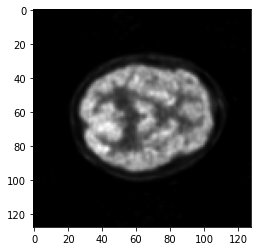

In [203]:
plt.imshow(dataset[0][:,:,32],cmap='gray')
plt.show()

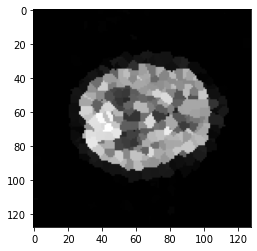

In [204]:
plt.imshow(converted[:,:,32],cmap='gray')
plt.show()

In [338]:
## Converting clusters to a datset
c_dataset = []

for c in clusters:
    c_dataset.append([c.x,c.y,c.z,c.i])
    
c_dataset = np.array(c_dataset)

In [339]:
#Scaling 
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(c_dataset)

In [340]:
scaled_dataset[:10,:]

array([[-1.60979495, -1.62771175, -1.56541256, -0.41088264],
       [-1.60979495, -1.62771175, -1.29589034, -0.41088264],
       [-1.60979495, -1.62771175, -1.02636811, -0.41088264],
       [-1.60979495, -1.62771175, -0.75684589, -0.41088264],
       [-1.60979495, -1.62771175, -0.48732366, -0.41088264],
       [-1.60979495, -1.62771175, -0.21780144, -0.41088264],
       [-1.60979495, -1.62771175,  0.05172079, -0.41088264],
       [-1.60979495, -1.62771175,  0.32124301, -0.41088264],
       [-1.60979495, -1.62771175,  0.59076524, -0.41088264],
       [-1.60979495, -1.62771175,  0.86028746, -0.41088264]])

## K Means Clustering

In [341]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

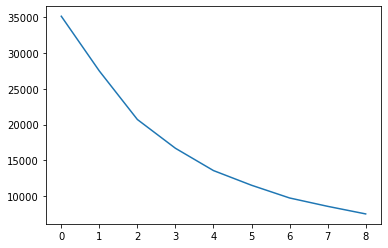

In [342]:
wcss = []
for i in range(1,10):
    k_clusters = KMeans(n_clusters=i)
    k_clusters.fit(scaled_dataset)
    wcss.append(k_clusters.inertia_)

plt.plot(wcss)
plt.show()
    

In [343]:
n_clusters = 10

In [344]:
k_clusters = KMeans(n_clusters=n_clusters)
k_clusters.fit(scaled_dataset)

KMeans(n_clusters=10)

In [345]:
lables = k_clusters.predict(scaled_dataset)

In [346]:
#Creating Segments
segments = []
shape = dataset[0].shape
for i in range(n_clusters):
    blank = np.zeros(shape)
    for c in np.array(clusters)[lables==i]:
        #blank[c.coord]=1.0
        for v in c.voxels.keys():
            blank[v] = 1.0
            
    
    segments.append(blank)

segments = np.array(segments)

In [347]:
level =36

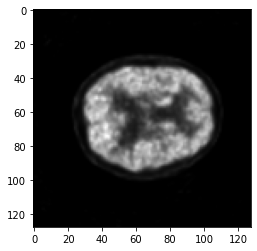

In [348]:
plt.imshow(dataset[0][:,:,level],cmap='gray')
plt.show()

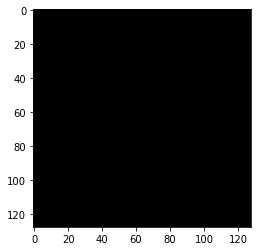

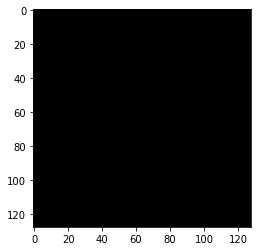

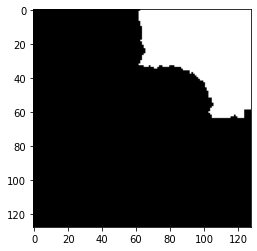

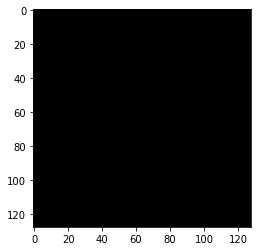

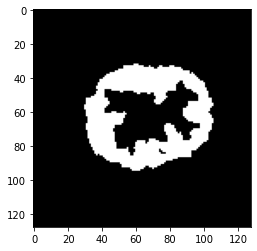

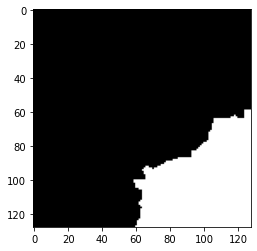

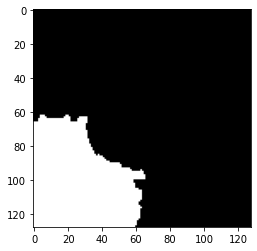

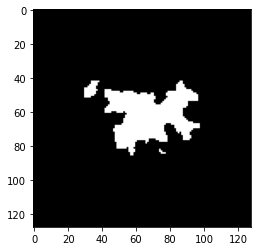

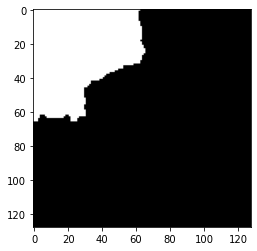

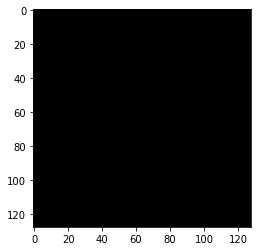

In [349]:
for seg in segments:
    plt.imshow(seg[:,:,level],cmap='gray')
    plt.show()

In [350]:
for i in set(lables):

    s = 0
    cnt = 0
    for c in np.array(clusters)[lables==i]:
        cnt += len(c.voxels.keys())
        for v in c.voxels.keys():
            s += dataset[0][v]
    print("For cluster ",i," mean = ",s/cnt)
            

For cluster  0  mean =  0.02942563035326978
For cluster  1  mean =  0.027790461037649327
For cluster  2  mean =  0.013582366364113014
For cluster  3  mean =  0.013053221347924488
For cluster  4  mean =  0.5061537135755085
For cluster  5  mean =  0.012899505003783214
For cluster  6  mean =  0.013429530170836956
For cluster  7  mean =  0.29747791193945294
For cluster  8  mean =  0.011611206606293983
For cluster  9  mean =  0.011561844731333695


## Attempt with DBScan

In [394]:
dbscan = DBSCAN(eps=0.43,min_samples=15)
lables = dbscan.fit_predict(scaled_dataset)

In [395]:
len(set(lables))

7

In [396]:
#Creating Segments
segments = []
shape = dataset[0].shape
for i in set(lables):
    blank = np.zeros(shape)
    for c in np.array(clusters)[lables==i]:
        #blank[c.coord]=1.0
        for v in c.voxels.keys():
            blank[v] = 1.0
            
    
    segments.append(blank)

segments = np.array(segments)

In [397]:
level = 36

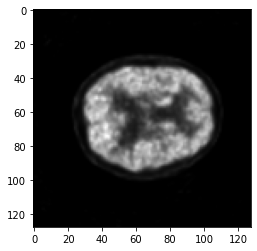

In [398]:
plt.imshow(dataset[0][:,:,level],cmap='gray')
plt.show()

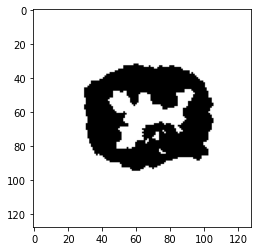

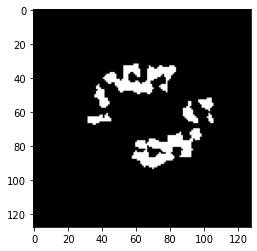

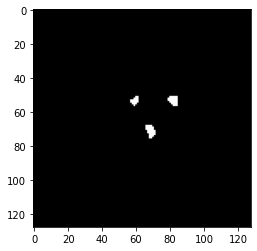

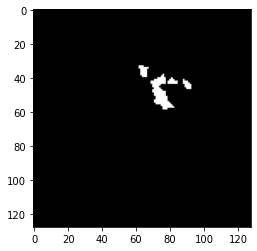

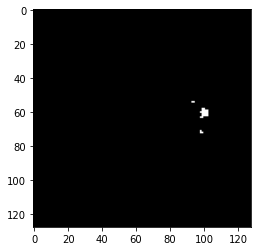

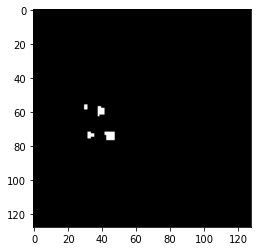

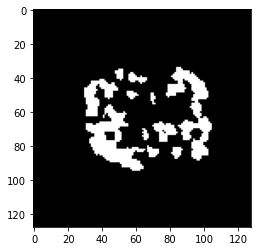

In [399]:
for seg in segments:
    plt.imshow(seg[:,:,level],cmap='gray')
    plt.show()

In [400]:
for i in set(lables):

    s = 0
    cnt = 0
    for c in np.array(clusters)[lables==i]:
        cnt += len(c.voxels.keys())
        for v in c.voxels.keys():
            s += dataset[0][v]
    print("For cluster ",i," mean = ",s/cnt)
            

For cluster  0  mean =  0.021334486303836754
For cluster  1  mean =  0.49797928023658716
For cluster  2  mean =  0.4251877487305936
For cluster  3  mean =  0.46144306172348604
For cluster  4  mean =  0.46317573969457054
For cluster  5  mean =  0.6402829871238409
For cluster  -1  mean =  0.42725196378012636


In [401]:
lis = []
for i in range(63):
    lis.append(np.moveaxis(np.array([segments[2,:,:,i],segments[1,:,:,i],segments[0,:,:,3]+segments[0,:,:,4]]),0,2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


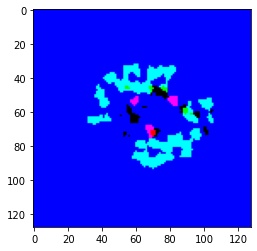

In [402]:
plt.imshow(lis[36])

## Trying Spectral Clustering

In [651]:
n_clusters = 5

In [653]:
sc = SpectralClustering(n_clusters=n_clusters)
lables = sc.fit_predict(scaled_dataset)

KeyboardInterrupt: 

In [529]:
#Creating Segments
segments = []
shape = dataset[0].shape
for i in range(n_clusters):
    blank = np.zeros(shape)
    for c in np.array(clusters)[lables==i]:
        #blank[c.coord]=1.0
        for v in c.voxels.keys():
            blank[v] = 1.0
            
    
    segments.append(blank)

segments = np.array(segments)

In [530]:
level = 36

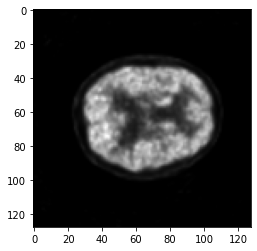

In [531]:
plt.imshow(dataset[0][:,:,level],cmap='gray')
plt.show()

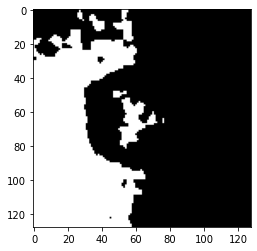

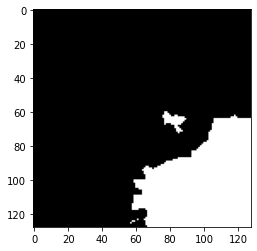

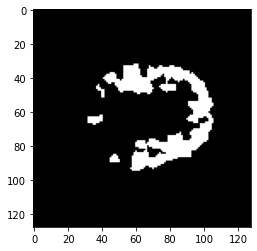

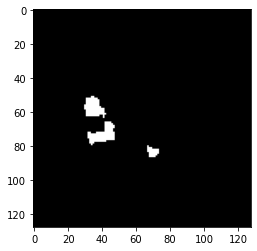

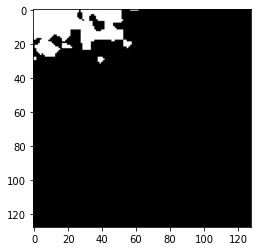

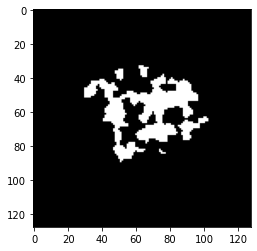

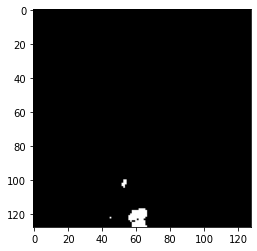

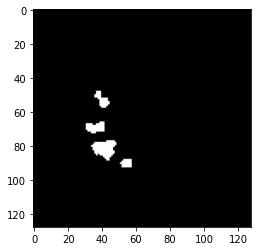

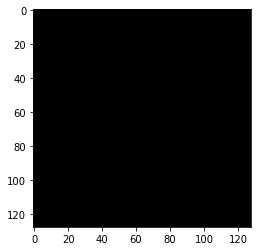

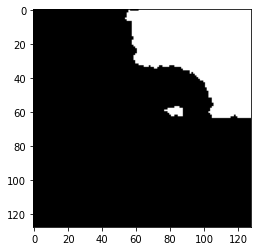

In [532]:
for seg in segments:
    plt.imshow(seg[:,:,level],cmap='gray')
    plt.show()

In [ ]:
for i in set(lables):

    s = 0
    cnt = 0
    for c in np.array(clusters)[lables==i]:
        cnt += len(c.voxels.keys())
        for v in c.voxels.keys():
            s += dataset[0][v]
    print("For cluster ",i," mean = ",s/cnt)
            